![](../src/logo.svg)

**© Jesús López**

Ask him any doubt on **[Twitter](https://twitter.com/jsulopz)** or **[LinkedIn](https://linkedin.com/in/jsulopz)**

<a href="https://colab.research.google.com/github/jsulopz/resolving-machine-learning/blob/main/06_Principal%20Component%20Analysis%20%28PCA%29/06_dimensionality-reduction-pca_practice_solution.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# 06 | Principal Component Analysis (PCA)

## Load the Data

- Simply execute the following lines of code to load the data
- This dataset contains **statistics** (columns)
- About **Car Models** (rows)

In [128]:
import seaborn as sns #!

df_cars = sns.load_dataset(name='mpg', index_col='name')
df_cars = df_cars.dropna()
df_cars.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
name,,,,,,,,
datsun 1200,35.0,4,72.0,69.0,1613,18.0,71,japan
chevrolet chevelle malibu classic,17.5,8,305.0,140.0,4215,13.0,76,usa
plymouth duster,23.0,6,198.0,95.0,2904,16.0,73,usa
chevrolet camaro,27.0,4,151.0,90.0,2950,17.3,82,usa
pontiac phoenix,33.5,4,151.0,90.0,2556,13.2,79,usa


## Data Preprocessing

- All variables need to be **comparables**.
- It is not the same to increase 1kg of weight, than 1m of height.
- We will use `StandardScaler()`.

In [129]:
import pandas as pd

In [138]:
df_carsdDummi = pd.get_dummies(df_cars)
df_carsdDummi

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
name,,,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,0,0,1
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,0,0,1
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,0,0,1
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,0,0,1
ford torino,17.0,8,302.0,140.0,3449,10.5,70,0,0,1
...,...,...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,0,0,1
vw pickup,44.0,4,97.0,52.0,2130,24.6,82,1,0,0
dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,0,0,1


In [137]:
from sklearn.preprocessing import StandardScaler

In [132]:
scale = StandardScaler()

In [106]:
df_scale= pd.DataFrame(scale.fit_transform(df_carsdDummi))

## `KMeans()` Model in Python

### Fit the Model

In [107]:
from sklearn.cluster import KMeans

In [108]:
model_km = KMeans(n_clusters=3)

In [109]:
model_km.fit(X=df_scale)

C:\Users\User\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\User\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



KMeans(n_clusters=3)

### Calculate Predictions

In [110]:
model_km.fit_predict(X=df_scale)

C:\Users\User\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\User\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 2, 2, 2, 2, 1, 0, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 0, 1, 0, 1,
       1, 0, 0, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 0, 1, 0, 1, 2,
       0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0,

### Create a New DataFrame for the Predictions

In [140]:
df_pred = df_carsdDummi.copy()

In [141]:
df_pred['pred_km']= model_km.fit_predict(X=df_scale)
df_pred

C:\Users\User\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\User\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa,pred_km
name,,,,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,0,0,1,2
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,0,0,1,2
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,0,0,1,2
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,0,0,1,2
ford torino,17.0,8,302.0,140.0,3449,10.5,70,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,0,0,1,0
vw pickup,44.0,4,97.0,52.0,2130,24.6,82,1,0,0,1
dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,0,0,1,0


### Visualize the Model

In [142]:
import plotly.express as px


In [143]:
#px.scatter(data_frame=df_scale,x='',y='',color='pred_km')

### Model Interpretation

- Does the visualization makes sense?
- The points are mixed between the groups, why?
- We are **just representing 2 variables**
- And the model was **fitted with 7 variables**

## Grouping Variables with `PCA()`

In [144]:
%%HTML

<iframe width="560" height="315" src="https://www.youtube.com/embed/HMOI_lkzW08" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

### Transform Data to Components

- `PCA()` is another technique used to transform data.

How has the data been manipulated so far?

1. Original Data `df`
2. Normalized Data `dfnorm`
3. Principal Components Data `dfpca` (now)

In [145]:
from sklearn.decomposition import PCA

In [146]:
pca=PCA()

In [147]:
pca.fit(X=df_scale)


PCA()

In [148]:
pca.transform(X=df_scale)

array([[ 2.80100539e+00,  3.20338831e-01,  6.56662515e-01, ...,
        -9.67794296e-02, -1.20803358e-01, -1.11022302e-16],
       [ 3.58436772e+00,  3.69644872e-01,  9.64883623e-01, ...,
         2.14274309e-01,  7.37237375e-02,  1.66533454e-16],
       [ 3.09974246e+00,  3.07663108e-01,  9.44898473e-01, ...,
         1.42800303e-01, -8.43377196e-02,  5.55111512e-16],
       ...,
       [-1.02515710e+00, -1.17010846e+00, -7.98796656e-01, ...,
        -2.20318258e-01,  4.82597041e-02, -8.32667268e-16],
       [-1.42150948e+00, -9.78213782e-01, -1.95863113e+00, ...,
         1.16671239e-01, -2.70588073e-02,  1.11022302e-15],
       [-1.56607216e+00, -1.02237750e+00, -2.09328358e+00, ...,
         6.91076278e-02, -1.20741588e-01,  1.55431223e-15]])

In [149]:
colums_pca= [f'PC{i}' for i in list(range (1,11))]
colums_pca

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']

In [150]:
df_pca= pd.DataFrame(pca.transform(X=df_scale),index=df_cars.index,columns=colums_pca)

In [151]:
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
name,,,,,,,,,,
chevrolet chevelle malibu,2.801005,0.320339,0.656663,0.518870,-0.738652,0.766243,-0.476786,-0.096779,-0.120803,-1.110223e-16
buick skylark 320,3.584368,0.369645,0.964884,0.282461,-0.588088,0.495804,0.004389,0.214274,0.073724,1.665335e-16
plymouth satellite,3.099742,0.307663,0.944898,0.251333,-0.963157,0.735577,-0.220338,0.142800,-0.084338,5.551115e-16
amc rebel sst,3.049356,0.367393,0.793047,0.490174,-0.709139,0.540139,-0.237422,0.291771,-0.148300,1.387779e-15
ford torino,3.037469,0.322174,0.968737,0.272668,-1.099928,0.590524,-0.477794,-0.003369,-0.175006,3.330669e-16
...,...,...,...,...,...,...,...,...,...,...
ford mustang gl,-0.884229,-1.007914,-1.428527,-0.754989,-0.609240,-0.634403,0.190549,-0.164383,0.018229,-1.110223e-16
vw pickup,-4.345385,1.261627,-2.119235,-0.856935,1.875910,1.368908,0.642127,0.287002,0.111745,7.216450e-16
dodge rampage,-1.025157,-1.170108,-0.798797,-1.471920,-1.911669,-0.243352,-0.042747,-0.220318,0.048260,-8.326673e-16


### Visualize Components & Clusters

- A **scatterplot** with `PC1` & `PC2`
- Colour points by cluster
- Are they **mixed** now?

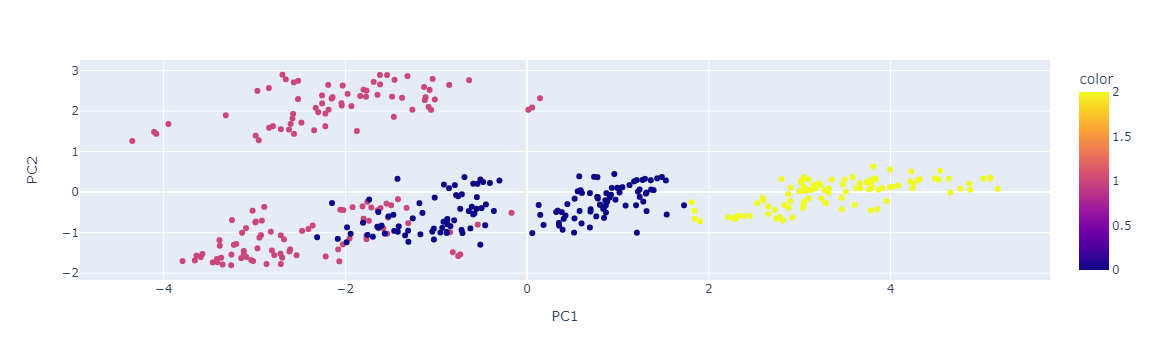

In [152]:
px.scatter(data_frame=df_pca,x='PC1',y='PC2',color=df_pred.pred_km, hover_name=df_cars.index)

### PCA & Clustering Interpretation

## Relationship between Original Variables & Components

- [ ] What do the columns PC1 & PC2 have to do with the original variables (speeding, alcohol, total,...)?

### Loading Vectors

In [139]:
df_weights = pd.DataFrame(pca.components_.T, columns=colums_pca,index=df_carsdDummi.columns)
df_weights.style.background_gradient()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
mpg,-0.368204,-0.152581,-0.047510,-0.256083,-0.150529,0.750074,0.365920,-0.195215,-0.126620,0.000000
cylinders,0.386894,-0.043270,0.020064,-0.108264,0.251762,0.477709,-0.545920,0.310660,-0.387541,0.000000
displacement,0.401424,-0.040104,0.014242,-0.105105,0.177852,0.300565,-0.002235,-0.116790,0.830894,-0.000000
horsepower,0.379861,0.014239,0.232914,-0.205505,0.056248,-0.066927,0.674604,0.529930,-0.124349,0.000000
weight,0.385033,0.007805,-0.040943,-0.113506,0.397484,-0.116998,0.212518,-0.709808,-0.341255,-0.000000
acceleration,-0.247214,0.041983,-0.447133,0.437151,0.663007,0.101564,0.212859,0.222434,0.037606,0.000000
model_year,-0.192661,-0.413815,-0.350777,-0.705839,0.218046,-0.298161,-0.112708,0.128486,0.068772,0.000000
origin_europe,-0.160989,0.750832,0.004778,-0.349922,0.132178,0.014992,-0.048129,0.015476,0.038002,0.515917
origin_japan,-0.213090,-0.425699,0.603595,0.119644,0.302273,-0.031913,-0.044280,-0.027401,0.030063,0.546561
origin_usa,0.302482,-0.234523,-0.503875,0.174551,-0.353844,0.014717,0.074334,0.010600,-0.054632,0.659621


### Correlation Matrix

- [ ] Which conclusions could you relate from the relationship of the 2 previous plots?

### Calculating One PCA Value

- [ ] How did we obtain `2.77` for **chevrolet chevelle malibu** in **PC1**?

## Explained Variance Ratio

### Biplot

# Achieved Goals

_Double click on **this cell** and place an `X` inside the square brackets (i.e., [X]) if you think you understand the goal:_

- [ ] Understand the role of **Linear Algebra** on Machine Learning
    - Matrix Multiplications with the `loadings`
- [ ] Necessity to `StandardScaler()` the data when the algorithm implies distance calculations
- [ ] Understand that every Machine Learning process is a matter of optimization
    - To find the best numbers based on a criteria
    - How is done in `PCA()`?
- [ ] Why would you use PCA?
    - Visualization
    - Preprocess the data for modelling
- [ ] There are techniques for everything
    - [ ] Grouping observations
    - [ ] Grouping variables

<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License</a>.